In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Mục tiêu: Tìm giá trị có ích để tối ưu chi phí sản xuất***

# ***Data: Chemical Using***

In [ ]:
#nhập thư viện
import pandas as pd
#lấy dữ liệu
df = pd.read_csv('/content/drive/MyDrive/Thực Tập/Chemical Using.csv')
# Đặt lại index
df = df.reset_index()
# Tạo cột mới là sự chênh lệch giữa Kg và RealKg
df['Re_Kg_RealKg'] = df['Kg'] - df['RealKg']

# Hiển thị DataFrame sau khi thêm cột mới
print(df.head())
print(df['Re_Kg_RealKg'].sum())

   index  ChemicalId       Kg   RealKg  ScalerId               StartScale  \
0      0          58    999.0    950.0      1041  2021-03-30 02:15:45.470   
1      1         153   2040.0   2000.0      1041  2021-03-30 02:16:48.237   
2      2          51  24000.0  23970.0      1042  2021-03-30 12:24:38.333   
3      3          52   6000.0   5950.0      1042  2021-03-30 13:09:17.200   
4      4          64   2192.4   2150.0      1042  2021-03-30 18:53:26.677   

                  EndScale  Re_Kg_RealKg  
0  2021-03-30 02:15:54.787          49.0  
1  2021-03-30 02:16:55.503          40.0  
2  2021-03-30 12:24:59.337          30.0  
3  2021-03-30 13:09:37.097          50.0  
4  2021-03-30 18:53:34.327          42.4  
200655.89000000004


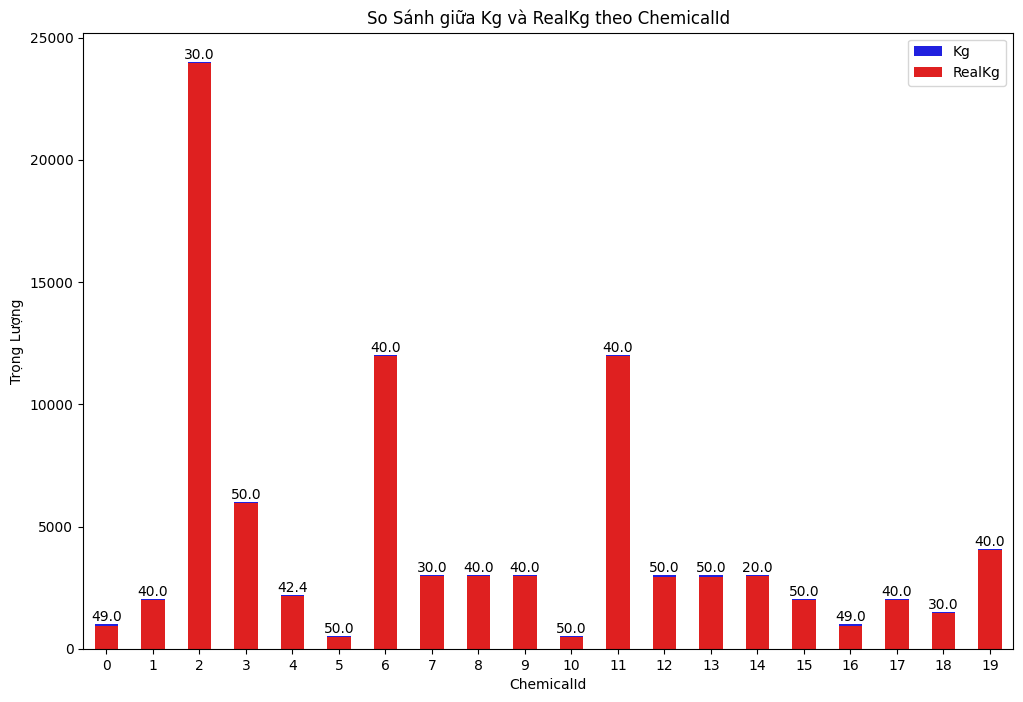

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Làm tròn giá trị Re_Kg_RealKg đến 2 số thập phân
df['Re_Kg_RealKg'] = df['Re_Kg_RealKg'].round(2)

# Tăng kích thước của biểu đồ
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ so sánh giữa Kg và RealKg với khoảng cách giữa các cột tăng lên
ax = sns.barplot(x='index', y='Kg', data=df.head(20), color='blue', label='Kg', width=0.5)
sns.barplot(x='index', y='RealKg', data=df.head(20), color='red', label='RealKg', width=0.5)

# Hiển thị giá trị Re_Kg_RealKg lên mỗi cột
for index, value in enumerate(df['Re_Kg_RealKg'].head(20)):
    ax.text(index, df['Kg'].head(20)[index] + 1, str(value), ha='center', va='bottom')

# Thêm tiêu đề và chú thích
plt.title('So Sánh giữa Kg và RealKg theo ChemicalId')
plt.xlabel('ChemicalId')
plt.ylabel('Trọng Lượng')
plt.legend()
plt.show()


# ***Tạo mô hình dự đoán***

In [ ]:
# Chuyển đổi cột 'StartScale' và 'EndScale' sang kiểu datetime
df['StartScale'] = pd.to_datetime(df['StartScale'])
df['EndScale'] = pd.to_datetime(df['EndScale'])

# Thêm cột mới là giá trị của EndScale trừ StartScale
df['TimeDifference'] = (df['EndScale'] - df['StartScale'])

# Hiển thị DataFrame sau khi thêm cột mới
print(df.head())

   index  ChemicalId       Kg   RealKg  ScalerId              StartScale  \
0      0          58    999.0    950.0      1041 2021-03-30 02:15:45.470   
1      1         153   2040.0   2000.0      1041 2021-03-30 02:16:48.237   
2      2          51  24000.0  23970.0      1042 2021-03-30 12:24:38.333   
3      3          52   6000.0   5950.0      1042 2021-03-30 13:09:17.200   
4      4          64   2192.4   2150.0      1042 2021-03-30 18:53:26.677   

                 EndScale  Re_Kg_RealKg         TimeDifference  
0 2021-03-30 02:15:54.787          49.0 0 days 00:00:09.317000  
1 2021-03-30 02:16:55.503          40.0 0 days 00:00:07.266000  
2 2021-03-30 12:24:59.337          30.0 0 days 00:00:21.004000  
3 2021-03-30 13:09:37.097          50.0 0 days 00:00:19.897000  
4 2021-03-30 18:53:34.327          42.4 0 days 00:00:07.650000  


In [ ]:
# chia dữ liệu X , y
# Xóa các cột
df = df.drop(columns=['StartScale','EndScale','Re_Kg_RealKg','TimeDifference','index'])
df.values

array([[   58.,   999.,   950.,  1041.],
       [  153.,  2040.,  2000.,  1041.],
       [   51., 24000., 23970.,  1042.],
       ...,
       [   58.,  1020.,  1000.,  1063.],
       [   52.,  4080.,  4060.,  1063.],
       [   64.,  9000.,  8960.,  1063.]])

In [ ]:
from sklearn.model_selection import train_test_split

# Xác định các đặc trưng (features) và biến mục tiêu
X = df[['ChemicalId', 'Kg', 'ScalerId']]
y = df['RealKg']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Chọn mô hình
model = RandomForestRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
#kiểm tra kết quả của mô hình dự đoán
#nhập dữ liệu ChemicalId
data1 = 58
#nhập dữ liệu Kg
data2 = 999
#nhập dữ liệu ScalerId
data3 = 1041
print(model.predict([[data1,data2,data3]]))

[950.1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# ***data: sale***

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Thực Tập/Sale.csv')
df.head()

In [ ]:
df['ProductId'].unique()

array([ 14,  36,  45,   8,  11, 164,  28,   5,  26,  46,  22, 165,   6,
        33,  12,   2,  16,  32, 250, 184, 282,  25,  21,   9, 200,   3,
        13,  31, 255, 245,  10, 281, 188, 229, 183, 170,  39,  27,  23,
       290, 166,  38, 193,  35,   4, 291,  41, 289,  29,  34,  47, 266,
       222, 292, 286,   7, 202, 224, 284, 240, 272, 263, 297, 186,  37,
       274, 278, 296, 244, 242, 251, 208, 285, 254, 287, 301, 302, 199,
       226, 303,  40, 305, 172, 307, 306, 192, 309, 180, 308, 283, 181,
       269, 304, 241, 205, 247, 311, 317, 206, 318, 187, 319, 216, 320,
       321, 273, 322, 323, 228, 325, 324, 237, 328, 329, 327, 330, 331,
       332, 334, 335, 337, 209, 220, 341, 262, 326, 342])

In [ ]:
# Lọc sản phẩm có số lượng bán cao nhất
max_total_quantity = df[df['TotalQuantity'] == df['TotalQuantity'].max()]

# Lọc sản phẩm có số lượng bán thấp nhất
min_total_quantity = df[df['TotalQuantity'] == df['TotalQuantity'].min()]

# In ra thông tin sản phẩm có số lượng bán cao nhất
print("Sản phẩm có số lượng bán cao nhất:")
print(max_total_quantity)

print('-' * 100)

# In ra thông tin sản phẩm có số lượng bán thấp nhất
print("Sản phẩm có số lượng bán thấp nhất:")
print(min_total_quantity)


Sản phẩm có số lượng bán cao nhất:
      ProductId  TotalQuantity  Quantity              CreatedDate  CustomerId
6992        183            150    3050.8  2023-08-23 12:57:19.000         194
----------------------------------------------------------------------------------------------------
Sản phẩm có số lượng bán thấp nhất:
       ProductId  TotalQuantity  Quantity              CreatedDate  CustomerId
1             36              1      69.2  2021-05-14 08:29:58.000          16
3              8              1      19.6  2023-01-30 08:14:56.000          21
119          250              1      19.3  2023-02-08 15:49:51.000         145
385          250              1      19.4  2023-02-16 09:41:18.000         145
386          250              1      20.6  2023-02-16 09:43:06.000         145
...          ...            ...       ...                      ...         ...
10053        184              1      20.3  2023-11-08 12:56:16.000         194
10322        192              1      10.

In [ ]:
# lọc khách hàng có lượng mua nhiều nhất
sorted_df = df.sort_values(by='TotalQuantity', ascending=False)

# Hiển thị DataFrame đã sắp xếp
print(sorted_df[['CustomerId', 'TotalQuantity']])


      CustomerId  TotalQuantity
6992         194            150
45             2            139
1515          64            135
1074           2            130
1386          64            128
...          ...            ...
7993         150              1
9296         114              1
8020         188              1
6132           2              1
3312           2              1

[10566 rows x 2 columns]


In [ ]:
# Chia cột 'CreatedDate' thành ngày và thời gian
date_time_parts = df["CreatedDate"].str.split(" ", n=1, expand=True)

# Thêm cột 'Date' chứa ngày
df['Date'] = date_time_parts[0]

# Chuyển 'Date' thành kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

# Thêm cột 'Year', 'Month', và 'Day'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.iloc[4:]

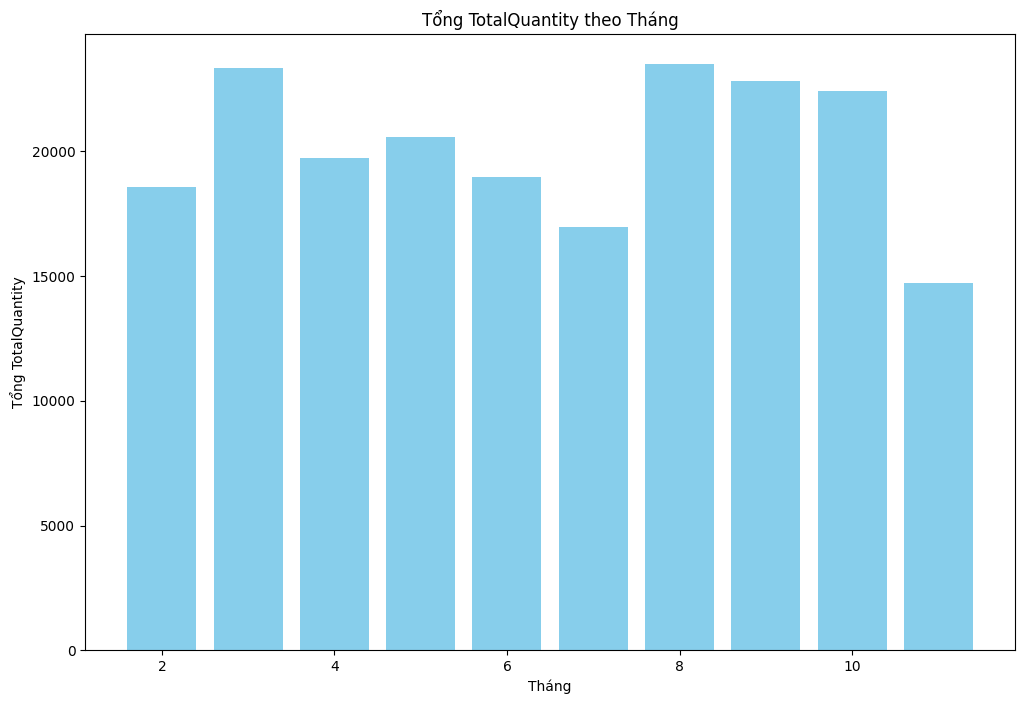

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Groupby theo 'Month' và tính tổng của 'TotalQuantity'
monthly_total_quantity = df.groupby('Month')['TotalQuantity'].sum().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
plt.bar(monthly_total_quantity['Month'], monthly_total_quantity['TotalQuantity'], color='skyblue')

# Đặt tiêu đề và nhãn
plt.title('Tổng TotalQuantity theo Tháng')
plt.xlabel('Tháng')
plt.ylabel('Tổng TotalQuantity')

# Hiển thị biểu đồ
plt.show()
